In [1]:
# Initialize and Import Required Modules

In [2]:
# General Libraries
import torch
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:


# Test cifar 121



In [4]:
# Import the MNIST Autoencoder file
import CIFAR10_121  

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define arguments
args = argparse.Namespace(
    data_path="../data",
    batch_size=512,
    latent_dim=128,
    device=device
)

In [5]:
#Load the Dataset and Check It

Files already downloaded and verified


Files already downloaded and verified


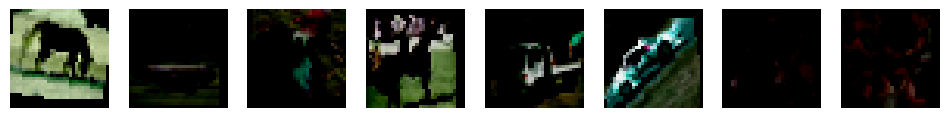

In [6]:
# Load dataset
train_loader, val_loader, test_loader = CIFAR10_121.load_data(args)

# Retrieve a batch of images
images_0_1, _ = next(iter(train_loader))

# Convert images to range [0,255] for proper display
images_0_255 = images_0_1 * 255  # Scale if needed

# Visualize some images
fig, axes = plt.subplots(1, 8, figsize=(12, 4))
for i in range(8):
    img = images_0_255[i].permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure valid pixel values
    axes[i].imshow(img)
    axes[i].axis("off")

plt.show()


In [7]:
#Verify the Autoencoder Model Architecture

In [8]:
# Initialize model
model = CIFAR10_121.Autoencoder(args.latent_dim).to(args.device)

# Print model summary
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=1024, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Unflatten

In [9]:
#Run a Single Forward Pass

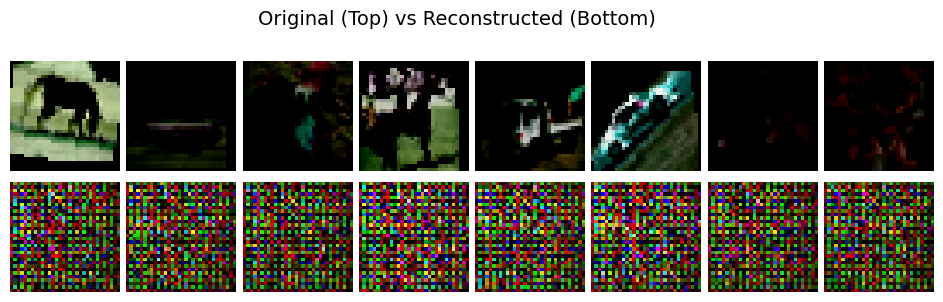

In [10]:
# Move images to the correct device
images_0_1 = images_0_1.to(args.device)

# Pass through the autoencoder
with torch.no_grad():
    recon_images_0_1 = model(images_0_1)

# Scale back to [0,255]
recon_images_0_255 = (recon_images_0_1 * 255)

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
plt.subplots_adjust(wspace=0, hspace=0.1)

# Add row titles manually
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    img = images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[0, i].imshow(img)  
    axes[0, i].axis("off")

    # Reconstructed images
    recon_img = recon_images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    recon_img = np.clip(recon_img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[1, i].imshow(recon_img)  
    axes[1, i].axis("off")

plt.show()


In [11]:
#Train for One Epoch to Check Loss Computation

In [12]:
CIFAR10_121.train_autoencoder(model, train_loader, val_loader, args, epochs=40)

Epoch [1/40], Train Loss: 0.2251, Val Loss: 0.1367


Epoch [2/40], Train Loss: 0.1041, Val Loss: 0.0899


Epoch [3/40], Train Loss: 0.0803, Val Loss: 0.0832


Epoch [4/40], Train Loss: 0.0683, Val Loss: 0.0681


Epoch [5/40], Train Loss: 0.0584, Val Loss: 0.0614


Epoch [6/40], Train Loss: 0.0530, Val Loss: 0.0544


Epoch [7/40], Train Loss: 0.0487, Val Loss: 0.0485


Epoch [8/40], Train Loss: 0.0435, Val Loss: 0.0457


Epoch [9/40], Train Loss: 0.0402, Val Loss: 0.0465


Epoch [10/40], Train Loss: 0.0386, Val Loss: 0.0416


Epoch [11/40], Train Loss: 0.0367, Val Loss: 0.0394


Epoch [12/40], Train Loss: 0.0353, Val Loss: 0.0380


Epoch [13/40], Train Loss: 0.0342, Val Loss: 0.0391


Epoch [14/40], Train Loss: 0.0334, Val Loss: 0.0378


Epoch [15/40], Train Loss: 0.0319, Val Loss: 0.0352


Epoch [16/40], Train Loss: 0.0314, Val Loss: 0.0369


Epoch [17/40], Train Loss: 0.0306, Val Loss: 0.0349


Epoch [18/40], Train Loss: 0.0299, Val Loss: 0.0305


Epoch [19/40], Train Loss: 0.0291, Val Loss: 0.0297


Epoch [20/40], Train Loss: 0.0287, Val Loss: 0.0340


Epoch [21/40], Train Loss: 0.0282, Val Loss: 0.0299


Epoch [22/40], Train Loss: 0.0276, Val Loss: 0.0282


Epoch [23/40], Train Loss: 0.0272, Val Loss: 0.0274


Epoch [24/40], Train Loss: 0.0267, Val Loss: 0.0266


Epoch [25/40], Train Loss: 0.0263, Val Loss: 0.0266


Epoch [26/40], Train Loss: 0.0259, Val Loss: 0.0264


Epoch [27/40], Train Loss: 0.0255, Val Loss: 0.0269


Epoch [28/40], Train Loss: 0.0252, Val Loss: 0.0270


Epoch [29/40], Train Loss: 0.0252, Val Loss: 0.0248


Epoch [30/40], Train Loss: 0.0247, Val Loss: 0.0246


Epoch [31/40], Train Loss: 0.0246, Val Loss: 0.0245


Epoch [32/40], Train Loss: 0.0242, Val Loss: 0.0247


Epoch [33/40], Train Loss: 0.0241, Val Loss: 0.0237


Epoch [34/40], Train Loss: 0.0239, Val Loss: 0.0235


Epoch [35/40], Train Loss: 0.0237, Val Loss: 0.0230


Epoch [36/40], Train Loss: 0.0237, Val Loss: 0.0231


Epoch [37/40], Train Loss: 0.0234, Val Loss: 0.0228


Epoch [38/40], Train Loss: 0.0233, Val Loss: 0.0229


Epoch [39/40], Train Loss: 0.0233, Val Loss: 0.0226


Epoch [40/40], Train Loss: 0.0232, Val Loss: 0.0229


In [13]:
#Verify Reconstruction

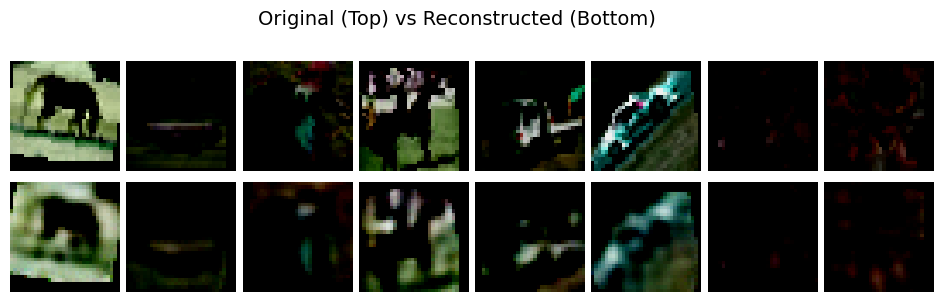

In [14]:
# Pass through the autoencoder
with torch.no_grad():
    recon_images_0_1 = model(images_0_1)

# Convert images to CPU for visualization
recon_images_0_1 = recon_images_0_1.cpu()

# Scale back to [0,255]
recon_images_0_255 = (recon_images_0_1 * 255)

# Create the figure
fig, axes = plt.subplots(2, 8, figsize=(12, 3))
plt.subplots_adjust(wspace=0, hspace=0.1)

# Add row titles manually
fig.suptitle("Original (Top) vs Reconstructed (Bottom)", fontsize=14, y=1.05)

for i in range(8):
    # Original images
    img = images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    img = np.clip(img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[0, i].imshow(img)  
    axes[0, i].axis("off")

    # Reconstructed images
    recon_img = recon_images_0_255[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) → (H, W, C)
    recon_img = np.clip(recon_img, 0, 255).astype("uint8")  # Ensure pixel values are in valid range
    axes[1, i].imshow(recon_img)  
    axes[1, i].axis("off")

plt.show()

In [15]:
#classifier traning

In [16]:
classifier = CIFAR10_121.Classifier(args.latent_dim).to(args.device)
CIFAR10_121.train_classifier(model, classifier, train_loader, val_loader, args, epochs=40)

Epoch [1/40], Train Loss: 2.1999, Train Acc: 20.02%


Epoch [2/40], Train Loss: 2.0279, Train Acc: 26.80%


Epoch [3/40], Train Loss: 1.9668, Train Acc: 29.40%


Epoch [4/40], Train Loss: 1.9230, Train Acc: 31.20%


Epoch [5/40], Train Loss: 1.8826, Train Acc: 32.74%


Epoch [6/40], Train Loss: 1.8580, Train Acc: 33.61%


Epoch [7/40], Train Loss: 1.8309, Train Acc: 34.36%


Epoch [8/40], Train Loss: 1.8164, Train Acc: 35.17%


Epoch [9/40], Train Loss: 1.7949, Train Acc: 35.60%


Epoch [10/40], Train Loss: 1.7831, Train Acc: 36.26%


Epoch [11/40], Train Loss: 1.7703, Train Acc: 36.51%


Epoch [12/40], Train Loss: 1.7634, Train Acc: 37.32%


Epoch [13/40], Train Loss: 1.7650, Train Acc: 36.95%


Epoch [14/40], Train Loss: 1.7513, Train Acc: 37.38%


Epoch [15/40], Train Loss: 1.7440, Train Acc: 37.36%


Epoch [16/40], Train Loss: 1.7414, Train Acc: 37.71%


Epoch [17/40], Train Loss: 1.7357, Train Acc: 37.88%


Epoch [18/40], Train Loss: 1.7252, Train Acc: 38.35%


Epoch [19/40], Train Loss: 1.7214, Train Acc: 38.40%


Epoch [20/40], Train Loss: 1.7217, Train Acc: 38.45%


Epoch [21/40], Train Loss: 1.7164, Train Acc: 38.64%


Epoch [22/40], Train Loss: 1.7132, Train Acc: 38.85%


Epoch [23/40], Train Loss: 1.7108, Train Acc: 38.40%


Epoch [24/40], Train Loss: 1.7048, Train Acc: 39.15%


Epoch [25/40], Train Loss: 1.7071, Train Acc: 39.09%


Epoch [26/40], Train Loss: 1.7011, Train Acc: 38.76%


Epoch [27/40], Train Loss: 1.7010, Train Acc: 39.19%


Epoch [28/40], Train Loss: 1.6905, Train Acc: 39.35%


Epoch [29/40], Train Loss: 1.6970, Train Acc: 39.16%


Epoch [30/40], Train Loss: 1.6865, Train Acc: 39.66%


Epoch [31/40], Train Loss: 1.6934, Train Acc: 39.27%


Epoch [32/40], Train Loss: 1.6934, Train Acc: 39.30%


Epoch [33/40], Train Loss: 1.6907, Train Acc: 39.70%


Epoch [34/40], Train Loss: 1.6861, Train Acc: 39.56%


Epoch [35/40], Train Loss: 1.6865, Train Acc: 39.65%


Epoch [36/40], Train Loss: 1.6820, Train Acc: 39.92%


Epoch [37/40], Train Loss: 1.6855, Train Acc: 39.76%


Epoch [38/40], Train Loss: 1.6813, Train Acc: 39.89%


Epoch [39/40], Train Loss: 1.6831, Train Acc: 39.77%


Epoch [40/40], Train Loss: 1.6826, Train Acc: 39.63%
Finished Training Classifier
